# Simple Shallow Auto ENcoder with PADO, with and without original images
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: Linear
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
* No constraints
* Adding a decomposition of the images by openings of decreasing sizes of openings by reconstruction

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print(x_small.shape)

(10, 28, 28, 1)


# 1. With PADO but no original images

In [7]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 6)

In [3]:
results = pd.read_csv("../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Simple/TestOutputs/18_09_10results")
results

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,1.668101,0.599484,0.856,100,0.007828,22.419479,22.497735,0.05577,0.007658,22.247117,22.407362,0.054399


Original images and reconstructions - Test MSE:  0.007828251123428345


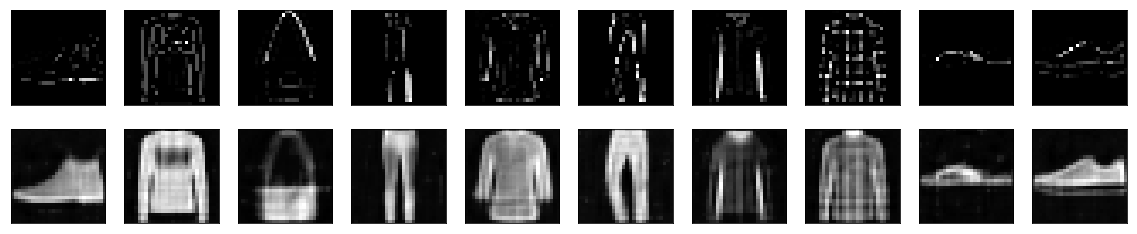

Histograms of encodings - Sparsity (Hoyer):  0.0557696670293808


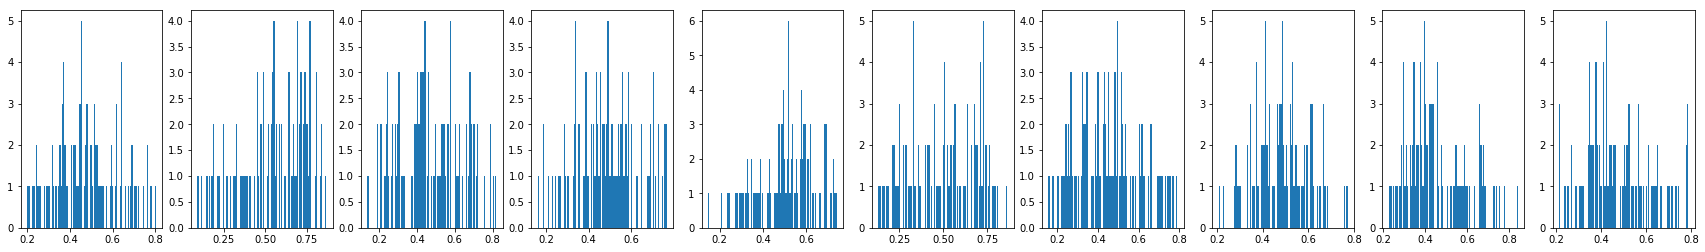

Atom images (weights of the encoder)


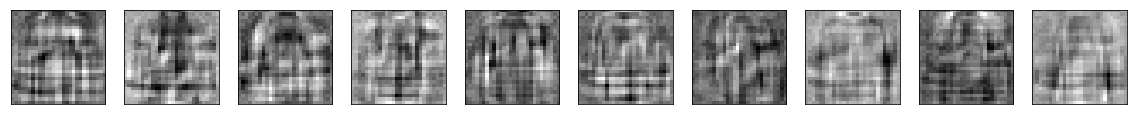

In [8]:
AE = ShallowAE.load('18_09_10_dim100.h5', path_to_model_directory="../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/")
print('Original images and reconstructions - Test MSE: ', results['test_error'][0])
AE.plot_reconstructions(x_small_PADO, plot_input=True)
print('Histograms of encodings - Sparsity (Hoyer): ', results['test_sparsity'][0])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images (weights of the encoder)')
AE.plot_atoms_decoder(nb_to_plot=10)

Dilatation of original images


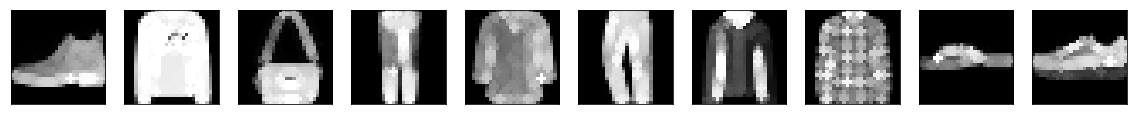

Dilatation of reconstructed images


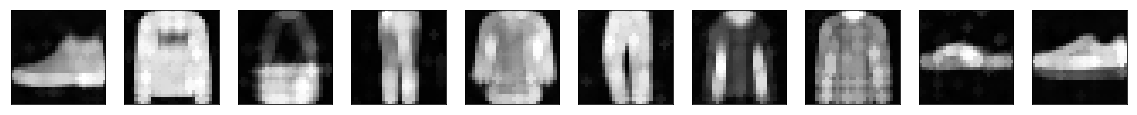

Max-approximation to dilatation
Max-approx error to original:  22.41947885742188  - Max-approx error to reconstruction:  22.497735070800786


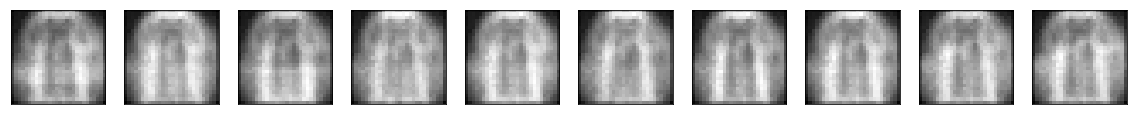

Dilatation of decoder weights


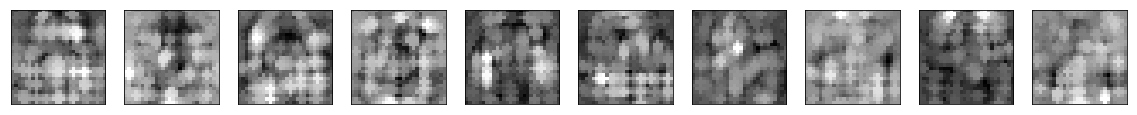

In [11]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Max-approximation to dilatation')
print('Max-approx error to original: ', results['test_max_approx_error_toOriginal_dilatation'][0], ' - Max-approx error to reconstruction: ', results['test_max_approx_error_toRec_dilatation'][0])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilatation of decoder weights')
AE_dil.plot_atoms_decoder(nb_to_plot=10)

In [12]:
AE.max_approximation_error(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False), morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(25.599975775146483, 22.030634579467772)

In [14]:
AE.best_linearSVM_classification_score(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False), y_test, nb_values_C=30)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.2s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.2s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.2s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.2s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.3s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.2s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.4s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.4s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.4s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.7s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.8s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   2.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.8s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.8s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.6s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.7s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.6s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.7s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   2.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.7s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.7s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=   2.0s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   2.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.8s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.9s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   2.0s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.9s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.9s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 11.4min finished


(0.8184, 0.02693399339125186, {'C': 1.1721022975334805})

# 2. With PADO, and Original Images

In [15]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 7)

In [16]:
results = pd.read_csv("../Results/ShallowAE/SeveralChannels/WithPADO/Simple/TestOutputs/18_09_11results")
results

,Unnamed: 0,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,100,0.006859,18.222469,18.311105,0.068037,0.006761,18.191556,18.289529,0.068008


Original images and reconstructions - Test MSE:  0.006858837108314037


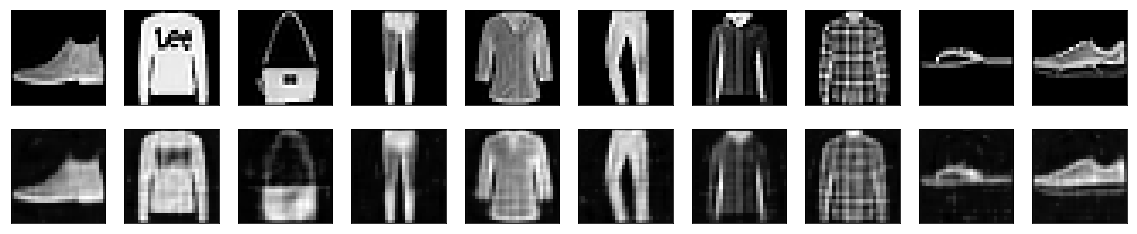

Histograms of encodings - Sparsity (Hoyer):  0.06803710758686066


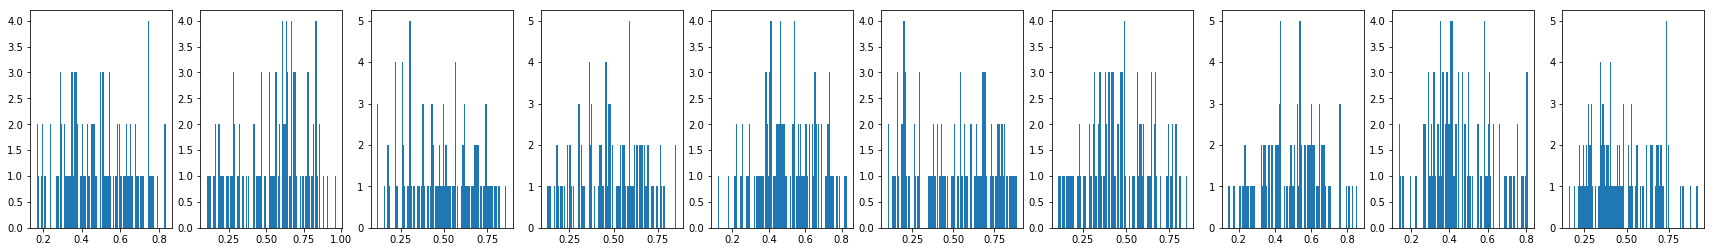

Atom images (weights of the encoder)


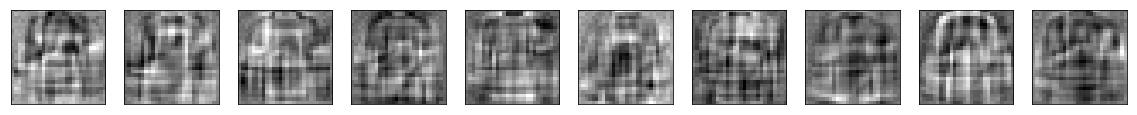

In [17]:
AE = ShallowAE.load('18_09_11_dim100.h5', path_to_model_directory="../Results/ShallowAE/SeveralChannels/WithPADO/")
print('Original images and reconstructions - Test MSE: ', results['test_error'][0])
AE.plot_reconstructions(x_small_PADO, plot_input=True)
print('Histograms of encodings - Sparsity (Hoyer): ', results['test_sparsity'][0])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images (weights of the encoder)')
AE.plot_atoms_decoder(nb_to_plot=10)

Dilatation of original images


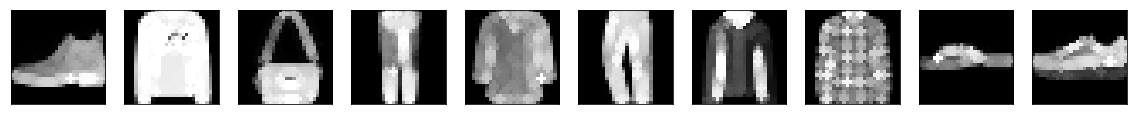

Dilatation of reconstructed images


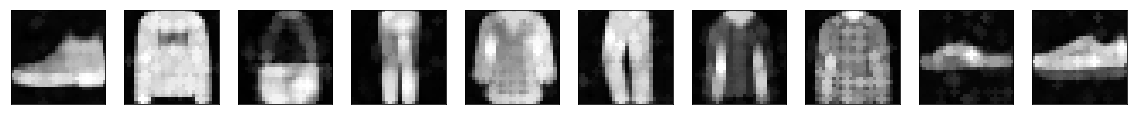

Max-approximation to dilatation
Max-approx error to original:  18.222468728637697  - Max-approx error to reconstruction:  18.311105349731445


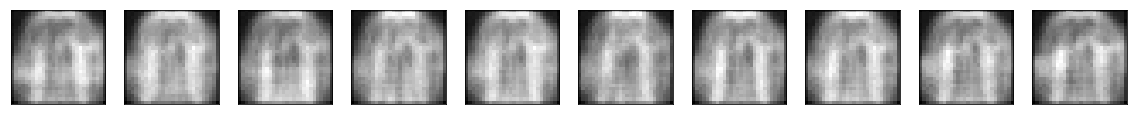

Dilatation of decoder weights


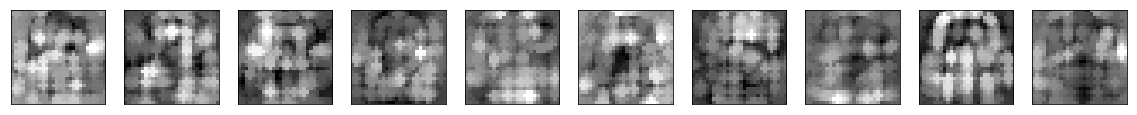

In [18]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Max-approximation to dilatation')
print('Max-approx error to original: ', results['test_max_approx_error_toOriginal_dilatation'][0], ' - Max-approx error to reconstruction: ', results['test_max_approx_error_toRec_dilatation'][0])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilatation of decoder weights')
AE_dil.plot_atoms_decoder(nb_to_plot=10)

In [19]:
AE.max_approximation_error(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True), morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(17.916817190551757, 18.038579608154297)

In [ ]:
AE.best_linearSVM_classification_score(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True), y_test, nb_values_C=30)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.7s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.6s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] .